In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score          
from sklearn.metrics import precision_score          
from sklearn.metrics import recall_score             
from sklearn.metrics import f1_score                 
from sklearn.metrics import log_loss                 
from sklearn.metrics import roc_curve                
from sklearn.metrics import precision_recall_curve    
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss




In [2]:
data = pd.read_csv(r'D:\KPI\7 семестр\ТМН\bioresponse.csv')
print(data.head()) 

   Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.585445  0.743663  ...      0      0      0      0      0      0      0   
1  0.411754  0.836582  ...      1      1      1      1      0      1      0   
2  0.517720  0.679051  ...      0      0      0      0      0      0      0   
3  0.288764  0.805110  ...      0      0      0      0      0      0      0   
4  0.303809  0.812646  ...      0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1      0      1   

In [3]:
y = data['Activity']  
X = data.drop('Activity', axis=1)  

In [4]:
from sklearn.model_selection import train_test_split
# Розбиття на тренувальну та тестову вибірки (80% для тренування, 20% для тестування)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Перевіряємо розмірності отриманих вибірок
print("Розмір тренувальних даних:", X_train.shape)
print("Розмір тестових даних:", X_test.shape)

Розмір тренувальних даних: (3000, 1776)
Розмір тестових даних: (751, 1776)


In [5]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  


def get_metrics(y_true, y_pred, y_proba, model_name):
    return {
        'Model Name': model_name,
        'Accuracy Score': f'{accuracy_score(y_true, y_pred):.2f}',
        'Precision Score': f'{precision_score(y_true, y_pred):.2f}',
        'Recall Score': f'{recall_score(y_true, y_pred):.2f}',
        'F1 Score': f'{f1_score(y_true, y_pred):.2f}',
        'Log Loss Score': f'{log_loss(y_true, y_proba):.2f}',  
    }

# Виклик функції для отримання метрик
metrics = get_metrics(y_test, y_pred, y_proba, 'Random Forest Model')
print(metrics)


{'Model Name': 'Random Forest Model', 'Accuracy Score': '0.80', 'Precision Score': '0.82', 'Recall Score': '0.83', 'F1 Score': '0.83', 'Log Loss Score': '0.45'}


Дрібне дерево прийняття рішень

Model Name: Shallow Decision Tree
Accuracy Score: 0.78
Precision Score: 0.79
Recall Score: 0.83
F1 Score: 0.81
Log Loss Score: 0.63


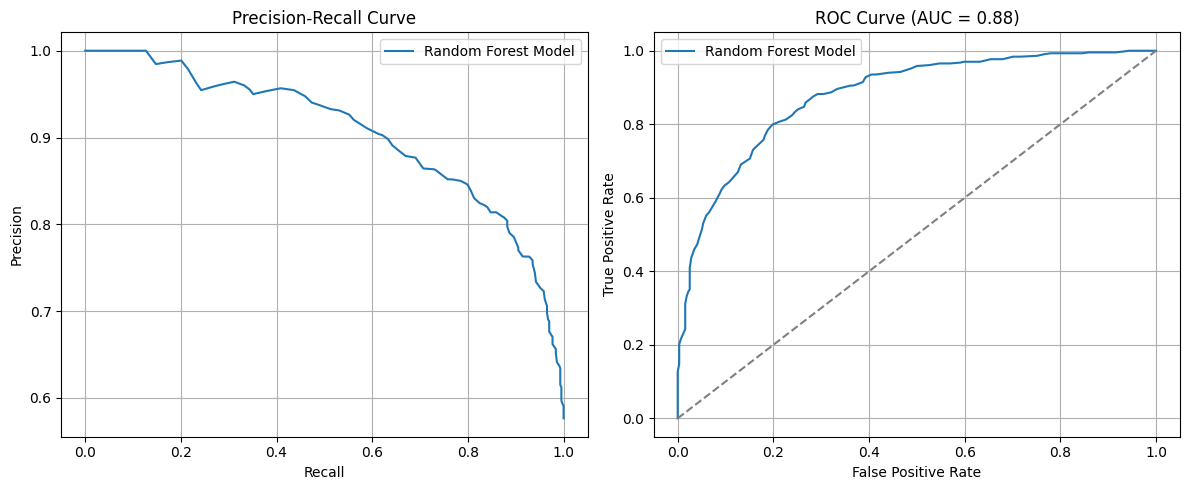

In [6]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
shallow_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
shallow_tree_model.fit(X_train, y_train)


shallow_tree_predictions = shallow_tree_model.predict(X_test)


shallow_tree_metrics = get_metrics(y_test, shallow_tree_predictions, 
                                    shallow_tree_model.predict_proba(X_test)[:, 1], 
                                    model_name='Shallow Decision Tree')


print(*[f'{field}: {value}' for field, value in shallow_tree_metrics.items()], sep='\n')

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(recall, precision, label='Random Forest Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label='Random Forest Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Лінія випадкового вибору
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Глибоке дерево прийняття рішень

Model Name: Deep Decision Tree
Accuracy Score: 0.74
Precision Score: 0.77
Recall Score: 0.79
F1 Score: 0.78
Log Loss Score: 6.54


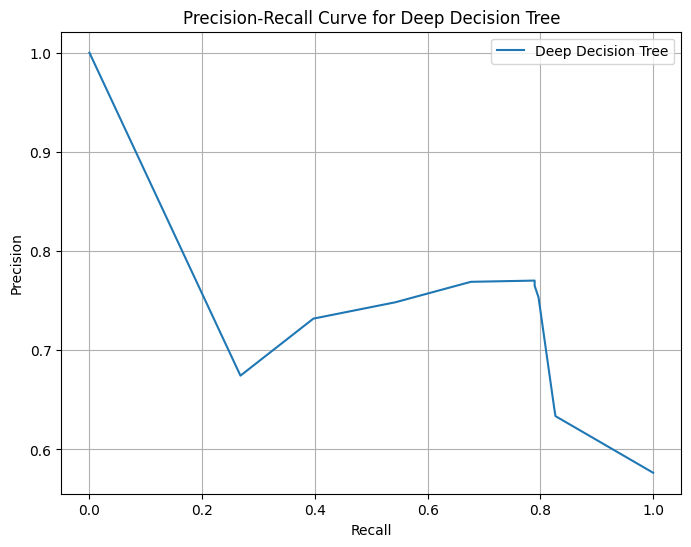

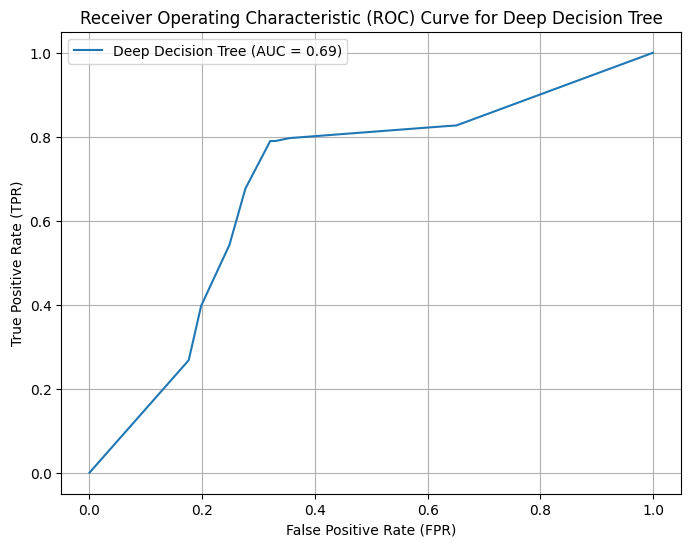

In [7]:
deep_tree_model = DecisionTreeClassifier(max_depth=15, random_state=42)
deep_tree_model.fit(X_train, y_train)

deep_tree_predictions = deep_tree_model.predict(X_test)

deep_tree_metrics = get_metrics(y_test, deep_tree_predictions, 
                                 deep_tree_model.predict_proba(X_test)[:, 1], 
                                 model_name='Deep Decision Tree')

print(*[f'{field}: {value}' for field, value in deep_tree_metrics.items()], sep='\n')

y_scores_deep = deep_tree_model.predict_proba(X_test)[:, 1]
precision_deep, recall_deep, _ = precision_recall_curve(y_test, y_scores_deep)

plt.figure(figsize=(8, 6))
plt.plot(recall_deep, precision_deep, label='Deep Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Deep Decision Tree')
plt.legend()
plt.grid()
plt.show()

fpr_deep, tpr_deep, _ = roc_curve(y_test, y_scores_deep)
roc_auc_deep = auc(fpr_deep, tpr_deep)

plt.figure(figsize=(8, 6))
plt.plot(fpr_deep, tpr_deep, label='Deep Decision Tree (AUC = {:.2f})'.format(roc_auc_deep))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Deep Decision Tree')
plt.legend()
plt.grid()
plt.show()

Випадковий ліс на дрібних деревах

Model Name: Shallow Random Forest
Accuracy Score: 0.76
Precision Score: 0.81
Recall Score: 0.76
F1 Score: 0.79
Log Loss Score: 0.55


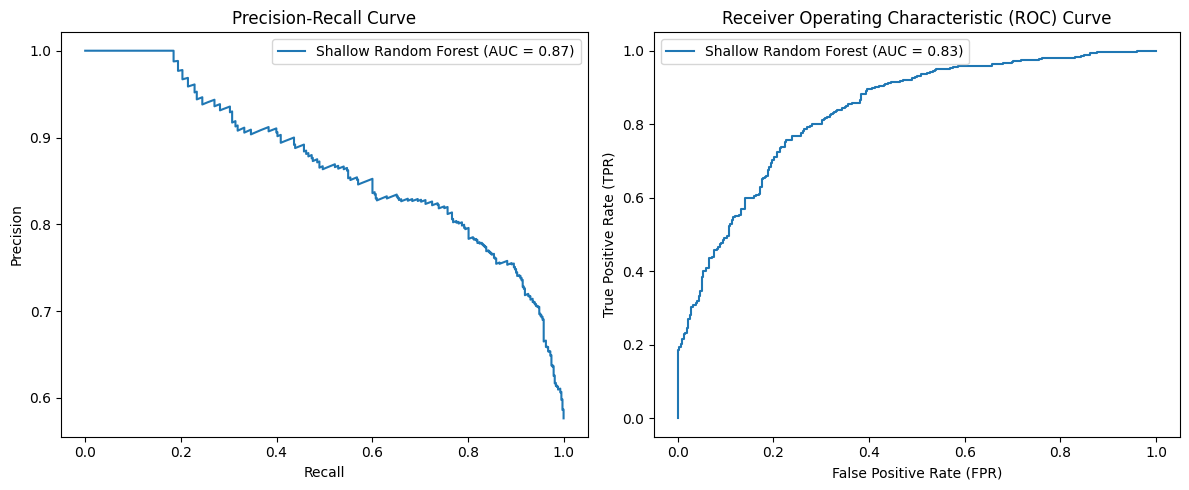

In [8]:
shallow_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
shallow_forest_model.fit(X_train, y_train)

shallow_forest_predictions = shallow_forest_model.predict(X_test)
shallow_forest_proba = shallow_forest_model.predict_proba(X_test)[:, 1]

shallow_forest_metrics = get_metrics(y_test, shallow_forest_predictions, 
                                      shallow_forest_proba, 
                                      model_name='Shallow Random Forest')

print(*[f'{field}: {value}' for field, value in shallow_forest_metrics.items()], sep='\n')

precision, recall, _ = precision_recall_curve(y_test, shallow_forest_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label='Shallow Random Forest (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

fpr, tpr, _ = roc_curve(y_test, shallow_forest_proba)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label='Shallow Random Forest (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.tight_layout()
plt.show()

Випадковий ліс на глибоких деревах

Model Name: Deep Random Forest
Accuracy Score: 0.81
Precision Score: 0.84
Recall Score: 0.83
F1 Score: 0.84
Log Loss Score: 0.45


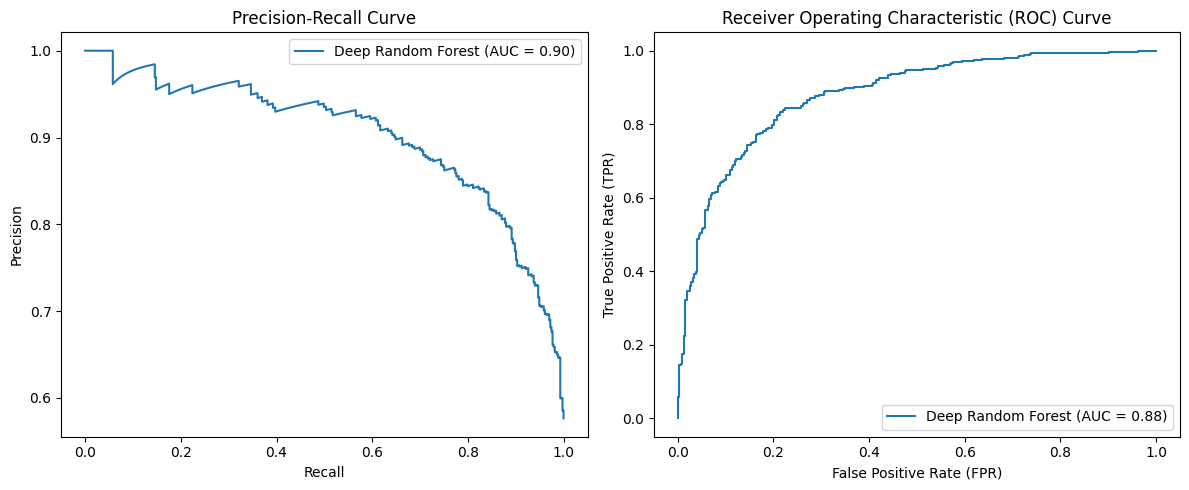

In [9]:
deep_forest_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
deep_forest_model.fit(X_train, y_train)

deep_forest_predictions = deep_forest_model.predict(X_test)
deep_forest_proba = deep_forest_model.predict_proba(X_test)[:, 1]

deep_forest_metrics = get_metrics(y_test, deep_forest_predictions, 
                                   deep_forest_proba, 
                                   model_name='Deep Random Forest')

print(*[f'{field}: {value}' for field, value in deep_forest_metrics.items()], sep='\n')

precision, recall, _ = precision_recall_curve(y_test, deep_forest_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label='Deep Random Forest (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

fpr, tpr, _ = roc_curve(y_test, deep_forest_proba)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label='Deep Random Forest (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

threshold = 0.6  # Можна змінити на 0.7 або вище, щоб уникати помилок II роду
y_pred = (y_prob >= threshold).astype(int)

# Виведення метрик
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('Log loss: ', log_loss(y_test, y_prob))  

Accuracy:  0.7776298268974701
Precision:  0.8633879781420765
Recall:  0.7297921478060047
F1:  0.7909887359198998
Log loss:  0.4467761303751432
